## Report: act_report


  <h1><center>REPORT</center></h1>                          
                                                      
   <h1>
    <center> ON

      DATA ANALYSIS OF
      WE RATE THE DOG USING:

     twitter-archive-enhanced.csv
        image-predictions.tsv 
        tweet_json.txt FILES
 </center></h1>                                                   
   
   
# <div style="text-align: right">BY: </div>
# <div style="text-align: right"> SULAIMAN TAJUDEEN </div>

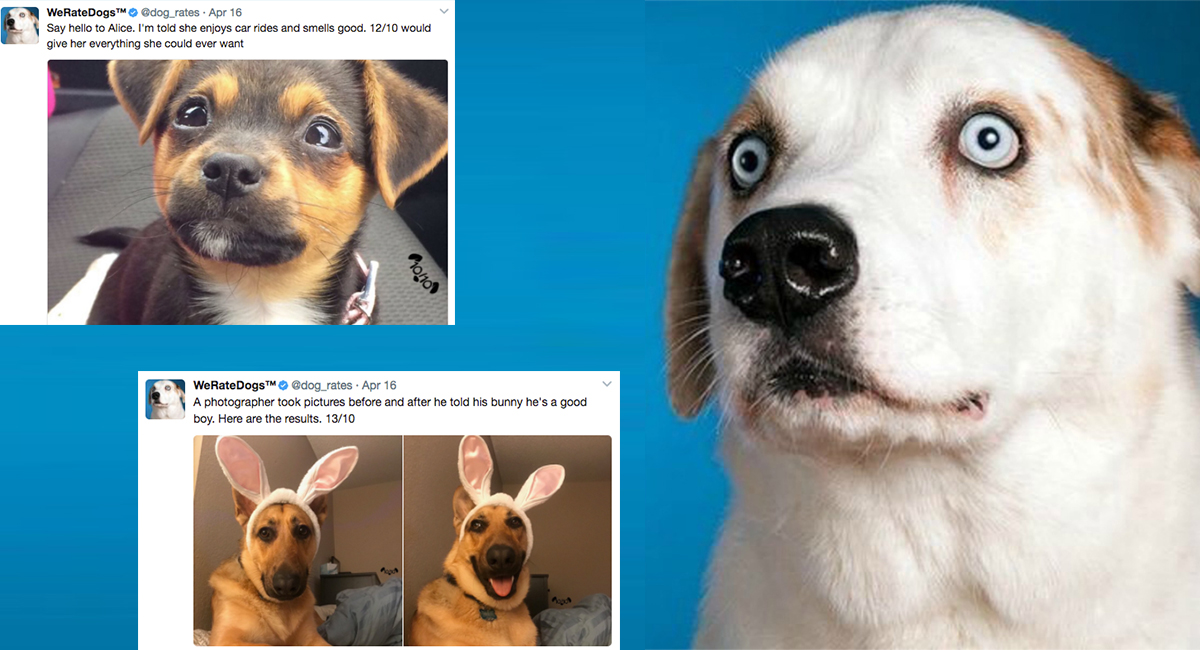

# Table Of Contents

 <a href='#Introduction'>Introduction </a>
 
 <a href='#Project-overview'> Project overview</a>
 
 <a href='#Data-Wrangling'>  Data Wrangling</a>
 
 <a href='#Data-Analysis-And-Visualization'> Data Analysis And Visualization</a>
 
 <a href='#Conclusion'> Conclusion</a>

### Introduction

In data analysis, wrangling comes first as real-world data rarely comes clean. This made wrangling the major work in this project. After carrying out an effective wrangling, several analysis was carried out to answer the insights derived from the data sets.

### Project overview

This project involves using Python and its libraries to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.The wrangling efforts were documented in a Jupyter Notebook `wrangle_report.ipynb` and the data were explored through analyses and visualizations using Python.

The dataset for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for me to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon

### Data Wrangling

The data needed for this project were gathered from these three piece of data files (`twitter-archive-enhanced.csv`
`image-predictions.tsv` and `tweet_json.txt`) using different formats. After gathering the data sets, the were assessed(visually and programmatically), cleaned and stored as `twitter_archive_master.csv`, a single file. The whole wrangling efforts were documented in a Jupyter Notebook called `wrangle_report.ipynb`.

### Data Analysis And Visualization

After storing the wtangled data, several anallysis and vusualizations were carried out to answer the following questions:

1.What are the most popular dog breeds?

2.What is the correlation between the retweet_count and favourite_count?

3.The dog stage with the highest rating by mean

4.The most popular dog name

5.The most popular dog stage

6.The dog stage with the highest favourite tweet count

#### 1.What are the most popular dog breeds?

Analysis was carried out based on the first, second and third prediction columns to discover the most popular dog breeds in each prediction by considering the first most famous 12 dog breeds 

In [12]:
from IPython.display import HTML

HTML('''<script>

code_show=true;

function code_toggle() {

if (code_show){

$('div.input').hide();

} else {

$('div.input').show();

}

code_show = !code_show

}

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Hide/Show code blocks"></form>''')

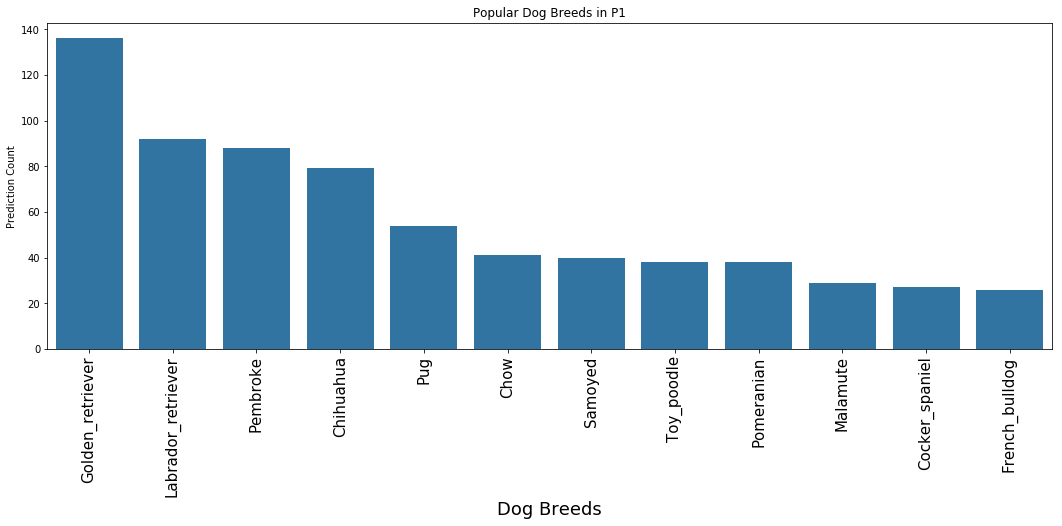

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df_cleaned = pd.read_csv('twitter_archive_master.csv')
# use bar chart to discover the most popular dog breeds in the first prescription 
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['first_prediction'].value_counts()[0:12].index,
            y =df_cleaned['first_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P1");

>In this first prediction bar chart, **Golden_retriever** is the most popular dog breed follwed by **Labrador_retriever**. 

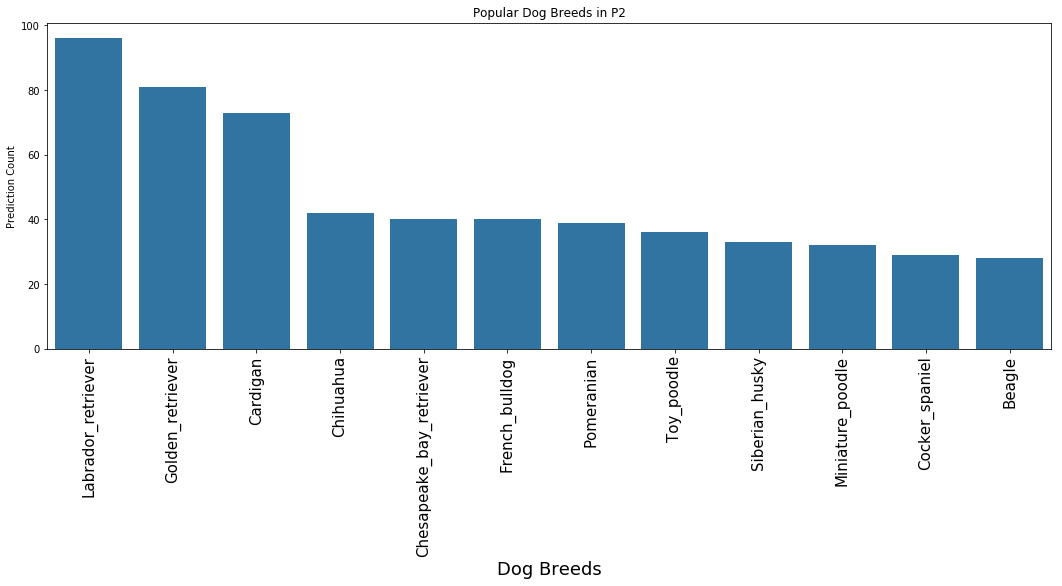

In [4]:
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['second_prediction'].value_counts()[0:12].index,
            y =df_cleaned['second_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P2");

>Using the second prediction, **Labrador_retriever** is the most popular breed followed by **Golden_retriever**.

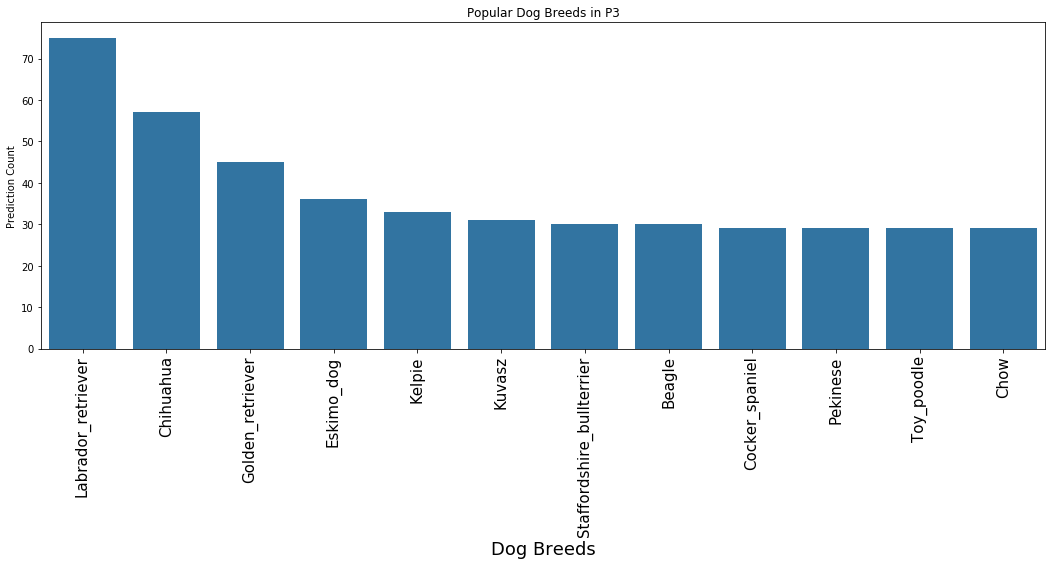

In [5]:
plt.figure(figsize = (18,6))
ax = sns.barplot(x = df_cleaned['third_prediction'].value_counts()[0:12].index,
            y =df_cleaned['third_prediction'].value_counts()[0:12],
            data = df_cleaned,color = sns.color_palette()[0]);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count");
plt.title("Popular Dog Breeds in P3");

Base on the third prediction values, **Labrador_retriever** is also the most frequent followed by **Chihuahua** and then **Golden_retriever**

<h1><center>These show that the most popular dog breeds are Golden_retriever and  Labrador_retriever</center></h1

#### 2.What is the correlation between the retweet_count and favourite_count?

The relationship between the retweet_count and favourite_count was discovered using scatter plot and plotting correlation matrix to derive their regression coefficient `r`

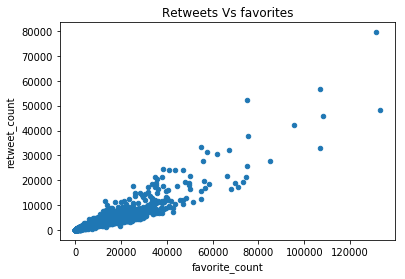

In [3]:
df_cleaned.plot.scatter(y="retweet_count", x="favorite_count");
plt.title('Retweets Vs favorites');

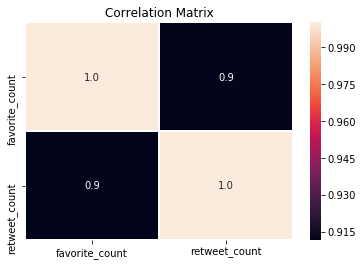

In [4]:
sns.heatmap(df_cleaned[[ 'favorite_count', 'retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.title('Correlation Matrix');

This shows that there is a positive correlation between the favorite("like") counts and retweet count (how many time a post was retweeted). We can believe that in most cases, retweets are usually the favorites but not all.
This also means that the previous posts can be recommended with either a high retweet counts or high favorite counts to model future posts.

#### The dog stage with the highest rating by mean

The dog stage with the highest rating by mean is a combined **doogo, puppo** stage. This was discovered by using groupby method. This was done by importing some python libraries- PIL import Image, io import BytesIO and the request(already imported to download image prediction file).

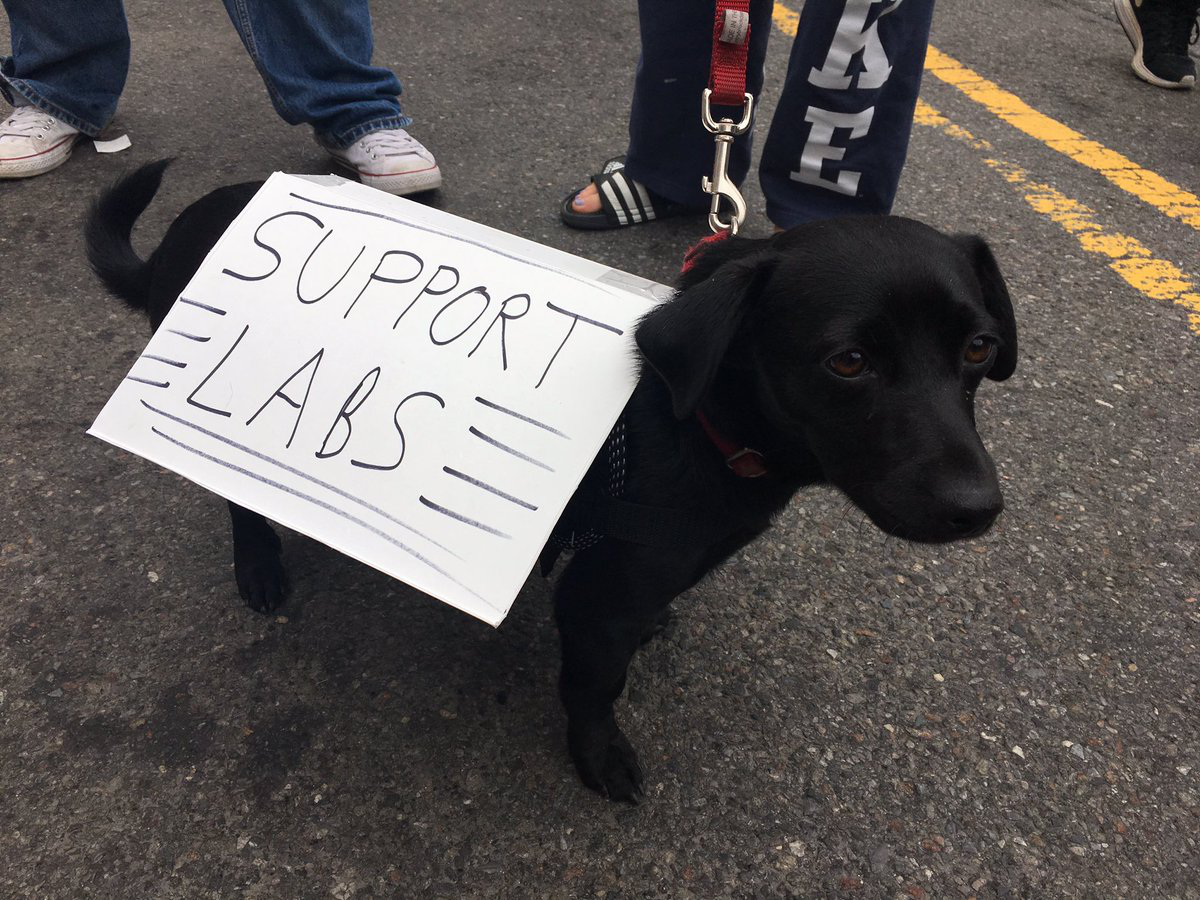

In [6]:
from PIL import Image
from io import BytesIO
import requests

dog_stage = df_cleaned.query('dog_stage == "doggo, puppo"')

url = dog_stage.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>A dog in the row of 'doggo, puppo' dog_stage</center></h1

#### The most popular dog name

 The most popular dog name by excluding the none value were Charlie and Lucy. This was discovered by invoking value_counts on the column dog name.

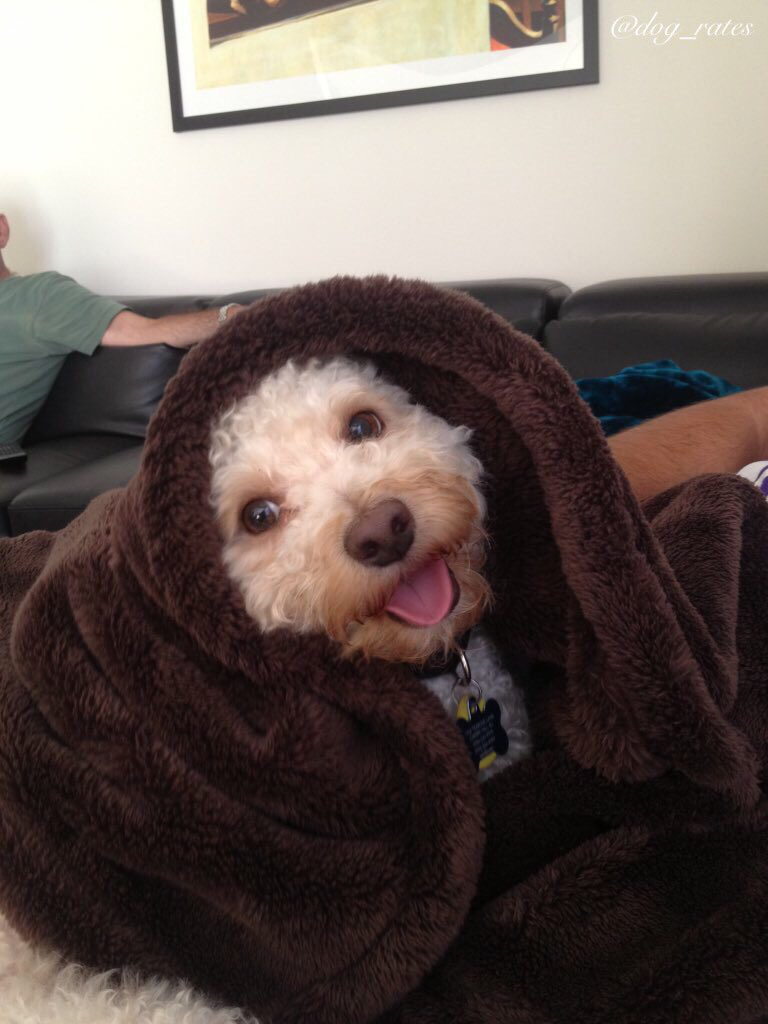

In [7]:
dog_name = df_cleaned.query('name == "Charlie"')

url = dog_name.jpg_url.iloc[10]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>One of the dogs named Charlie</center></h1>

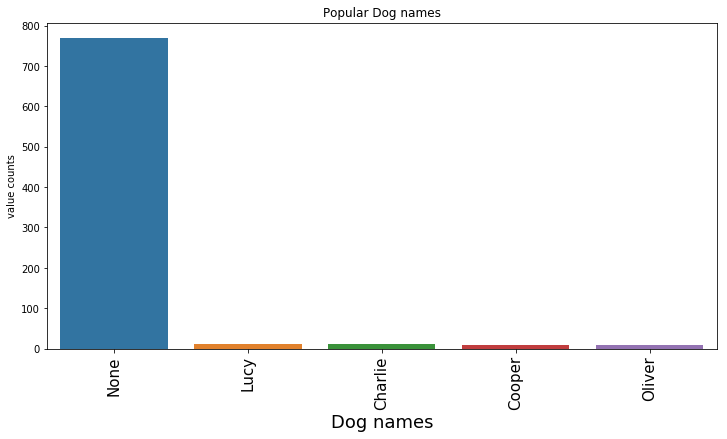

In [8]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = df_cleaned['name'].value_counts()[0:5].index,
            y =df_cleaned['name'].value_counts()[0:5],
            data = df_cleaned);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog names",fontsize = 18);
plt.ylabel("value counts");
plt.title("Popular Dog names");

#### The most popular dog stage

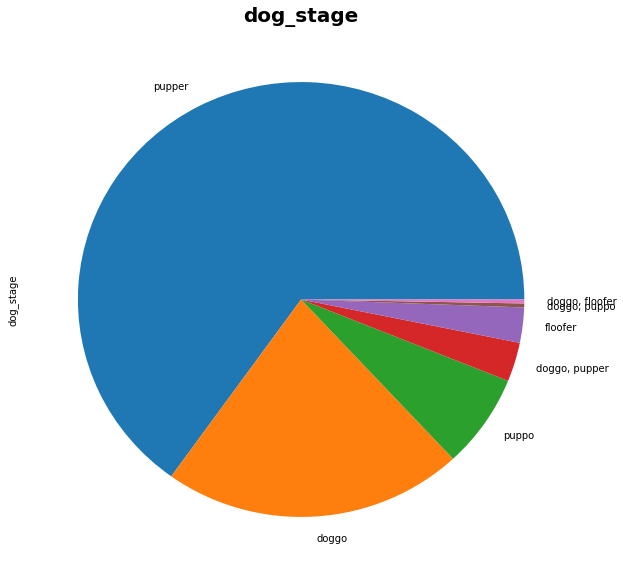

In [10]:
plt.figure(figsize = (10,10))
df_cleaned['dog_stage'].value_counts().plot(kind = 'pie')
plt.ylabel = ('')
plt.title('dog_stage', weight = 'bold', fontsize = 20);

<h1><center>The most popular dog stage is Pupper</center></h1> 

In [11]:
dog_stage = df_cleaned.query('dog_stage == "pupper"')

url = dog_stage.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

<h1><center>A dog at pupper stage</center></h1>

#### The dog stage with the highest favorite tweet count

The dog stage with the highest favorite tweet count is **Puppo**

### Conclusion

So far so good, this project has paved way for wrangling effect in data analysis even though not all the dirts and messes in the data sets were cleaned. I was able to use the cleaned data to give some insights and visualizations.
May God bless all data analysts as data itself is life!! 